<a href="https://colab.research.google.com/github/mariamelghandoor/Minimization_Algorithms/blob/main/Minimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import math
from scipy.optimize import minimize_scalar, minimize
import time

# Helper functions

In [ ]:
def grad_rosenbrock(x):
  x1, x2 = x
  grad = np.array([
      -400 * (x2 - x1**2) * x1 - 2 * (1 - x1),
      200 * (x2 - x1**2)
  ])
  return grad

In [ ]:
def H_rosenbrock(x):
  x1, x2 = x
  hessian = np.array([
      [1200 * x1**2 - 400 * x2 + 2, -400 * x1],
      [-400 * x1, 200]
  ])
  return hessian

In [ ]:
def rosenbrock(x):
  x1, x2 = x
  return 100 * (x2 - x1**2)**2 + (1 - x1)**2

In [ ]:
def grad_powell(x):
  x1, x2, x3, x4 = x
  grad = np.array([
    2 * (x1 + 10 * x2) + 40 * (x1 - x4)**3,
    20 * (x1 + 10 * x2) + 4 * (x2 - 2 * x3)**3,
    10 * (x3 - x4) - 8 * (x2 - 2 * x3)**3,
    -10 * (x3 - x4) - 40 * (x1 - x4)**3
  ])
  return grad

In [ ]:
def H_powell(x):
  x1, x2, x3, x4 = x
  hessian = np.zeros((4, 4))
  hessian[0, 0] = 2 + 120 * (x1 - x4)**2
  hessian[0, 1] = hessian[1, 0] = 20
  hessian[0, 3] = hessian[3, 0] = -120 * (x1 - x4)**2
  hessian[1, 1] = 200 + 12 * (x2 - 2 * x3)**2
  hessian[1, 2] = hessian[2, 1] = -24 * (x2 - 2 * x3)**2
  hessian[2, 2] = 10 + 48 * (x2 - 2 * x3)**2
  hessian[2, 3] = hessian[3, 2] = -10
  hessian[3, 3] = 10 + 120 * (x1 - x4)**2
  return hessian

In [ ]:
def powell(x):
  x1, x2, x3, x4 = x
  return (x1 + 10 * x2) ** 2 + 5 * (x3 - x4) ** 2 + (x2 - 2 * x3) ** 4 + 10 * (x1 - x4) ** 4

#1. Write Python subroutine, to implement the following 1D minimization algorithms:

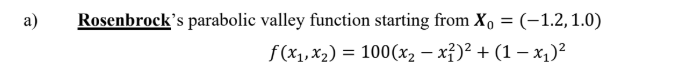

To make my problem 1D, let the direction s = tranpose([1  0.25])
so my function will be with respect to λ so
f(x + λS) = transpose( [(-1.2 + λ)   (1 + 0.25λ)] )

---

- x1 = -1.2 +  λ

- x2 = 1 + 0.25λ

---

for the second problem:
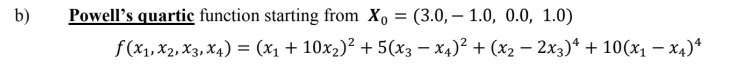
---

let s = transpose([1  0.25  1  0.25])

---

- x1 = 3 + λ

- x2 = -1 + 0.25λ

- x3 = λ

- x4 = 1 + 0.25λ




## a) Fibonacci method

### Method
-  **Fibonacci Search Method**: An optimization technique used to find the minimum of a unimodal function within a specified interval. It iteratively narrows down the search space based on Fibonacci numbers, using their properties for efficient interval reduction.

-  Interval [x_lower, x_upper] is updated in each iteration based on the minimum of x1 and x2
  - if f(x1) > f(x2) then x_upper = x1 and x_lower stayes the same
  - if f(x1) < f(x2) then x_lower = x2 and x_upper stayes the same

  and then update the ratio
- Convergence at k = n - 3
- Min be found mid my last interval



### code

In [ ]:
def fibonacci(function, x_lower, x_upper, iterations):
    """
    function: the function to minimize
    x_lower: lower bound of the interval
    x_upper: The upper bound of the interval
    iterations: The number of iterations

    """
    # the fib list has some fib numbers to be be able to use in my problem
    fib_list = [1, 1]
    for i in range(2, iterations):
        fib_list.append(fib_list[i-1] + fib_list[i-2])

    r = fib_list[iterations-2] / fib_list[iterations-1]
    d = r * (x_upper - x_lower)
    x2 = x_lower + d
    x1 = x_upper - d

    # print table to show
    print(f"{'Iteration':<10} {'x_lower':<15} {'x_upper':<15} {'d':<15}")
    print("-" * 45)

    # search where convergence at iterations - 3
    for i in range(iterations - 3):
        print(f"{i+1:<10} {x_lower:<15.6f} {x_upper:<15.6f} {d:<15.6f}")
        if function(x1) < function(x2):
            x_upper = x1
            x1 = x2
            r = fib_list[iterations - i - 3] / fib_list[iterations - i - 1]
            d = r * (x_upper - x_lower)
            x2 = x_lower + d
        else:
            x_lower = x2
            x2 = x1
            r = fib_list[iterations - i - 3] / fib_list[iterations - i - 1]
            d = r * (x_upper - x_lower)
            x1 = x_upper - d
    print(f"{iterations-1:<10} {x_lower:<15.6f} {x_upper:<15.6f} {d:<15.6f}")

    # midpoint of the end points
    mid = (x_upper + x_lower) / 2

    return function(mid),mid


### problem  1

In [ ]:
def function(x):
    return 100 * ((1 + 0.25 * x) - (-1.2 + x)**2)**2 + (1-(-1.2 + x))**2

x_lower = 0
x_upper = 4
iterations = 30
#calc cpu time
start_time = time.process_time()
#apply function
minimum_function, mid_point = fibonacci(function, x_lower, x_upper, iterations)
#print time and answer
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("The minimum is ", minimum_function,"at point ", mid_point)
print("X1 = ", -1.2 + mid_point  ,"X2 = ",1 + 0.25 * mid_point)

NameError: name 'time' is not defined

### Results:
- Minimum value: The minimum value of the function is approximately 0.07406510204072869.

- Point of minimum: The minimum occurs at 2.4721335512715736, which is the point where the algorithm converges.

X1, X2:

X1 = 1.2721335512715737

X2 = 1.6180333878178934

Interpretation:
- Final Interval Bounds: The final bounds after iteration 29 are 2.472126 (lower) and 2.472141 (upper), showing that the algorithm has narrowed down the search interval significantly.

- Minimum Value: The minimum value of the function is found to be 0.07406510204072869 at 2.4721335512715736, which indicates that the algorithm has successfully converged to a minimum point within the search range.



- Additional Observations:

  - and the direction might be a factor of the result not being the best

- CPU Time:

  - CPU Time: The entire process took 0.004912 seconds, which suggests that the algorithm is quite efficient.

- Conclusion:
  - The Fibonacci search method successfully converged to a minimum value of 0.07406510204072869 at 2.4721335512715736.

  - The algorithm narrowed the search interval down to the range between 2.472126 and 2.472141 by the 29th iteration.

  - answer should be 1 and 1 so it differs by 0.27 and 0.6




### problem 2

In [ ]:
###for refrence to get the optimal
import scipy.optimize as opt

# define the function you want to minimize
def func_to_minimize(x):
        return ((3 + x)+ 10 * (-1 + 0.25 * x))**2 + 5 *((x) - (1 + 0.25 * x))**2 + ((-1 + 0.25 * x) -2*(x))**4 + 10 * ((3 + x) - (1 + 0.25 * x))**4

# use scipy.optimize.minimize to find the minimum
result = opt.minimize(func_to_minimize, x0=0)  # Initial guess x0=0

# Print the result
print("minimum value:", result.fun)
print("at point:", result.x)


Minimum value: 147.27678682238937
At point: [-0.80757299]


In [ ]:
#function formulation
def function2(x):
    return ((3 + x)+ 10 * (-1 + 0.25 * x))**2 + 5 *((x) - (1 + 0.25 * x))**2 + ((-1 + 0.25 * x) -2*(x))**4 + 10 * ((3 + x) - (1 + 0.25 * x))**4

x_lower = -2
x_upper = 4
iterations = 30
#calc cpu time
start_time = time.process_time()
#apply function
minimum_function, mid_point = fibonacci(function2, x_lower, x_upper, iterations)
#print time and answer
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("The minimum is ", minimum_function,"at point ", mid_point)
print("X1 = ", 3 + mid_point  ,"X2 = ",-1 + 0.25 * mid_point, "X3 = ", mid_point,"X4 = ",1+0.25)


Iteration  x_lower         x_upper         d              
---------------------------------------------
1          -2.000000       4.000000        3.708204       
2          -2.000000       0.291796        0.875388       
3          -1.124612       0.291796        0.541020       
4          -1.124612       -0.249224       0.334369       
5          -0.790243       -0.249224       0.206651       
6          -0.790243       -0.455875       0.127717       
7          -0.662526       -0.455875       0.078934       
8          -0.662526       -0.534808       0.048784       
9          -0.613742       -0.534808       0.030150       
10         -0.613742       -0.564958       0.018634       
11         -0.595108       -0.564958       0.011516       
12         -0.595108       -0.576475       0.007117       
13         -0.587991       -0.576475       0.004399       
14         -0.587991       -0.580874       0.002719       
15         -0.585272       -0.580874       0.001680       
16        

### results
- Minimum value: The minimum of the function is approximately 151.67791603727073.
Point of minimum: The point where this minimum occurs is -0.5835935122172551.

X1, X2, X3, X4:

X1 =  2.416406487782745

X2 =  -1.1458983780543137

X3 =  -0.5835935122172551

X4 =  1.25

- Interpretation:

Final Interval Bounds: The final bounds after the 29th iteration are -0.583598 (lower) and  -0.583589(upper), which indicates the algorithm has narrowed down the search interval quite close to the solution.

Minimum Value: The function achieves a minimum value of 151.67791603727073 at -0.5835935122172551 This suggests that the function is minimized at this point within the defined search interval.

X1, X2, X3, X4: These seem to be intermediate calculations or specific points related to the Fibonacci search method.


CPU Time:
CPU Time: The process took 0.006392 seconds, which is quite efficient given the number of iterations.

- Additional Observations:

  - and the direction might be a factor of the result not being the best

- Conclusion:
  - The Fibonacci search method has converged to a minimum value of 151.67791603727073 at -0.5835935122172551.

  - The search interval has been sufficiently narrowed, and the algorithm has successfully found a minimum within the given bounds.

  - actual solution is lamda at point: [-0.80757299] and  Minimum value: 147.27678682238937 so its close but by diffrence of 0.22

## b) Golden section method

### Method
 - Golden Section Search: A numerical optimization technique used to find the minimum of a unimodal function within a given interval. It iteratively reduces the interval size by leveraging the golden ratio where r in the d = r(upper - lower) is always  = 0.618

 -  Interval [x_lower, x_upper] is updated in each iteration based on the minimum of x1 and x2
  - if f(x1) > f(x2) then x_upper = x1 and x_lower stayes the same
  - if f(x1) < f(x2) then x_lower = x2 and x_upper stayes the same

  and then update the ratio
- Convergence at small changees
- Min be found mid my last interval



### code

In [ ]:
def golden_section(function, x_lower, x_upper, iterations):
    """
    function: the function to minimize
    x_lower: lower bound of the interval
    x_upper: The upper bound of the interval
    iterations: The number of iterations

    """

    d = 0.618 * (x_upper - x_lower)
    x2 = x_lower + d
    x1 = x_upper - d

    # print table to show
    print(f"{'Iteration':<10} {'x_lower':<15} {'x_upper':<15} {'d':<15}")
    print("-" * 45)

    #search
    for i in range(iterations - 2):
        print(f"{i+1:<10} {x_lower:<15.6f} {x_upper:<15.6f} {d:<15.6f}")
        if function(x1) > function(x2):
            x1 = x2
            x_upper = x1
            d = 0.618 * (x_upper - x_lower)
            x2 = x_lower + d
        else:
            x_lower = x2
            x2 = x1
            d = 0.618 * (x_upper - x_lower)
            x1 = x_upper - d

    print(f"{iterations-1:<10} {x_lower:<15.6f} {x_upper:<15.6f} {d:<15.6f}")

    # midpoint of the end points
    mid = (x_upper + x_lower) / 2

    return function(mid),mid



### problem 1

In [ ]:
x_lower = -2
x_upper = 3
iterations = 30
# calc cpu time
start_time = time.process_time()
#use my method
minimum_function, mid_point = fibonacci(function, x_lower, x_upper, iterations)
#print resulst
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("The minimum is ", minimum_function,"at point ", mid_point)
print("X1 = ", -1.2 + mid_point  ,"X2 = ",1 + 0.25 * mid_point)


Iteration  x_lower         x_upper         d              
---------------------------------------------
1          -2.000000       3.000000        3.090170       
2          -2.000000       -0.090170       0.729490       
3          -2.000000       1.090170        1.180340       
4          -0.819660       1.090170        0.729490       
5          -0.819660       0.360680        0.450850       
6          -0.368810       0.360680        0.278640       
7          -0.368810       0.082039        0.172209       
8          -0.196601       0.082039        0.106431       
9          -0.196601       -0.024392       0.065778       
10         -0.130823       -0.024392       0.040653       
11         -0.130823       -0.065045       0.025125       
12         -0.105698       -0.065045       0.015528       
13         -0.105698       -0.080573       0.009597       
14         -0.096101       -0.080573       0.005931       
15         -0.096101       -0.086504       0.003666       
16        

### Results

- Minimum Value: The minimum value of the function is approximately 52.45172189260354.

- Point of Minimum: The minimum occurs at -0.09016693908946705, which is the point where the algorithm converges.

X1, X2:

X1 = -1.290166939089467

X2 = 0.9774582652276332

- Interpretation:
Final Interval Bounds: The final bounds after iteration 29 are -0.090176 (lower) and -0.090158 (upper), showing that the algorithm has narrowed down the search interval significantly.

- Minimum Value: The minimum value of the function is found to be 52.45172189260354 at -0.09016693908946705, indicating that the algorithm has successfully converged to a minimum point within the search range.

- CPU Time:
  - CPU Time: The entire process took 0.003768 seconds, suggesting that the algorithm is quite efficient.
- Conclusion:

  - The golden search method successfully converged to a minimum value of 52.45172189260354 at -0.09016693908946705.

  - The algorithm narrowed the search interval down to the range between -0.090176 and -0.090158 by the 29th iteration.

Answer should be 1 and 1 so it differs by 0.02 and 2.29.

- Additional Observations:
  - Comparison with Fibonacci and Golden Section:

 -  Both Fibonacci and Golden Section methods produced nearly the same result. This is logical, as the Fibonacci numbers increase and their ratios converge to approximately 0.618, which is the reduction number for the Golden Section method. this is why I changed the interval to see the effect
  Effect of Interval:

  - The choice of the interval appears to influence the result, as varying the interval changes the convergence behavior.
  
- Direction Factor:

  - The direction of the search might also affect the result, with certain directions leading to not the actual min.

### problem 2

In [ ]:
x_lower = -2
x_upper = 4
iterations = 30
# calc cpu time
start_time = time.process_time()
#use my method
minimum_function, mid_point = fibonacci(function2, x_lower, x_upper, iterations)
#print resulst
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("The minimum is ", minimum_function,"at point ", mid_point)
print("X1 = ", 3 + mid_point  ,"X2 = ",-1 + 0.25 * mid_point, "X3 = ", mid_point,"X4 = ",1+0.25)


Iteration  x_lower         x_upper         d              
---------------------------------------------
1          -2.000000       4.000000        3.708204       
2          -2.000000       0.291796        0.875388       
3          -1.124612       0.291796        0.541020       
4          -1.124612       -0.249224       0.334369       
5          -0.790243       -0.249224       0.206651       
6          -0.790243       -0.455875       0.127717       
7          -0.662526       -0.455875       0.078934       
8          -0.662526       -0.534808       0.048784       
9          -0.613742       -0.534808       0.030150       
10         -0.613742       -0.564958       0.018634       
11         -0.595108       -0.564958       0.011516       
12         -0.595108       -0.576475       0.007117       
13         -0.587991       -0.576475       0.004399       
14         -0.587991       -0.580874       0.002719       
15         -0.585272       -0.580874       0.001680       
16        

### results
- Minimum value: The minimum of the function is approximately 151.67791603727073.
Point of minimum: The point where this minimum occurs is -0.5835935122172551.

X1, X2, X3, X4:

X1 =  2.416406487782745

X2 =  -1.1458983780543137

X3 =  -0.5835935122172551

X4 =  1.25

- Interpretation:

Final Interval Bounds: The final bounds after the 29th iteration are -0.583598 (lower) and  -0.583589(upper), which indicates the algorithm has narrowed down the search interval quite close to the solution.

Minimum Value: The function achieves a minimum value of 151.67791603727073 at -0.5835935122172551 This suggests that the function is minimized at this point within the defined search interval.

CPU Time:
CPU Time: The process took 0.006392 seconds, which is quite efficient given the number of iterations.

- Conclusion:
  - The golden search search method has converged to a minimum value of 151.67791603727073 at -0.5835935122172551.

  - The search interval has been sufficiently narrowed, and the algorithm has successfully found a minimum within the given bounds.

  - actual solution is lamda at point: [-0.80757299] and  Minimum value: 147.27678682238937 so its close but by diffrence of 0.22

- Additional Observations:
  - fib and golden section got nearly the same result. This is logical as the fib numbers increase their division become approximatlt = 0.618 which is the reduction number of the golden section

  - and the direction might be a factor of the result not being the best

## d) Secant method

### Method

#### From Engneering optimization RAO book (2019)

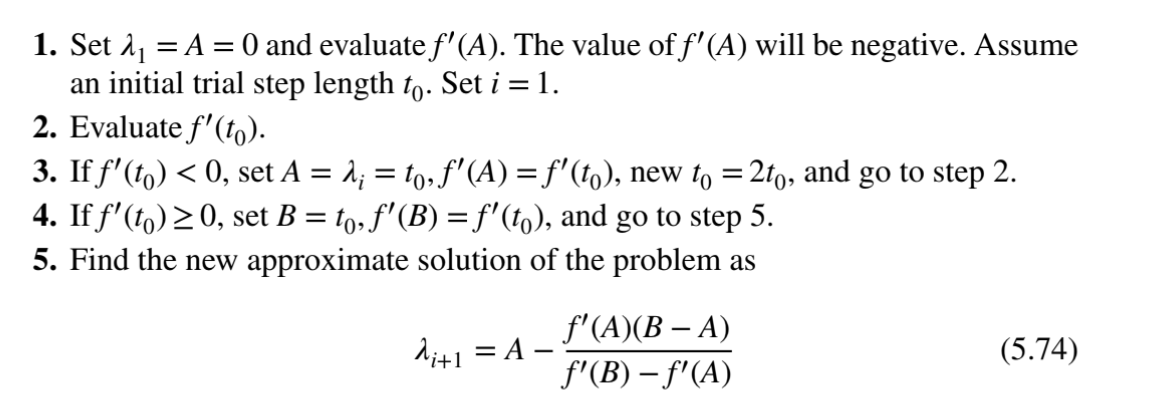

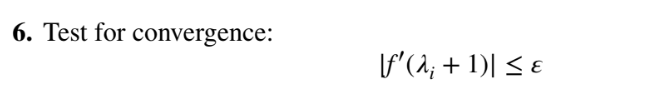

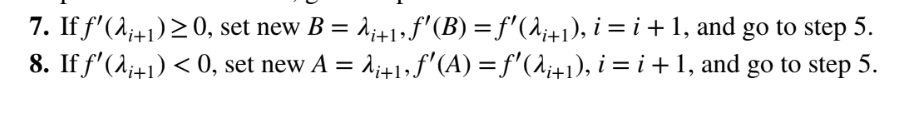

#### slides

- starting points: found the interval where the starting point is the value that in f`(x) gives negative and the other point gives positive so I know the min is inside the interval

- the min will is chosen from the interval as the mid of it

### code

In [ ]:
def find_starting_point(A, function_derivative, step_size, max_iter = 100,index = 0):
    """
    A: starting point
    function_derivative: derivative of the function
    step_size: step size for the search
    """
    # find the appropriate a and b in the interval
    if function_derivative(A) < 0:
        if function_derivative(A + step_size) > 0:
            return A, A + step_size
        if function_derivative(A - step_size) > 0:
            return A, A - step_size
    elif function_derivative(A) > 0:
        if function_derivative(A + step_size) < 0:
            return A  + step_size, A
        if function_derivative(A - step_size) < 0:
            return A  - step_size, A
    # if solution not fonud change step size and my start point
    if(max_iter > index):
      return find_starting_point(A + step_size, function_derivative, 2 * step_size,index=index+1)
    else:
      print("not found")
      return None,None

def secant_method(function, function_derivative, A, initial_step_size, epsilon , max_iteration = 100):
    """
    function: my problem to minimize
    function_derivative: derivative of the function
    A: starting point
    initial_step_size: step size for the search
    epsilon: stopping condition
    """
    # A and B denote two different approximations to the correct solution from the function i made above
    A, B = find_starting_point(A, function_derivative, initial_step_size)
    if(A == None and B == None):
      quit
    f_dash_A = function_derivative(A)
    f_dash_B = function_derivative(B)

    iteration = 1
    print(f"{'Iteration':<10}{'A':<10}{'B':<10}{'f(A)':<15}{'f(B)':<15}")
    # main loop of the Secant Method with two stopping conditions one when the change is so little or i got an interval that doesnt have the point
    while abs(B - A) > epsilon and iteration < max_iteration: # condition 1
        print(f"{iteration:<10}{A:<10.6f}{B:<10.6f}{f_dash_A:<15.6f}{f_dash_B:<15.6f}")

        # next step vauleformula
        lambda_i_plus_one = A - (f_dash_A * (B - A) / (f_dash_B - f_dash_A))

        # condition 2
        if abs(function(lambda_i_plus_one)) < epsilon :
            break

        # update points A or B
        if function_derivative(lambda_i_plus_one) >= 0:
            A, f_dash_A = lambda_i_plus_one, function_derivative(lambda_i_plus_one)
        else:
            B, f_dash_B = lambda_i_plus_one, function_derivative(lambda_i_plus_one)

        iteration += 1



    # midpoint estimate of the minimum
    min_val = (A + B) / 2
    min_function_value = function(min_val)
    print(f"Minimum found at = {min_val:.6f}, f(x) = {min_function_value:.6f}")
    return min_val, min_function_value



### problem 1

In [ ]:
def function(x):
    return 100 * ((1 + 0.25 * x) - (-1.2 + x)**2)**2 + (1-(-1.2 + x))**2
def function_drevative(x):
    return 200 * ( 1/4 - 2 * (x - 6/5)) * (x/4 - (x - 6/5)**2 + 1) - 2 * (11/5 - x)

A = 0
initial_step_size = 0.1
epsilon = 0.0000001
#calc cpu time
start_time = time.process_time()
#use method
min_val, min_function_value = secant_method(function, function_drevative, A, initial_step_size, epsilon)
end_time = time.process_time()
print(f"CPU time: {end_time - start_time:.6f} seconds")
# print results
print(f"The minimum is approximately at x = {min_val}, with function value f(x) = {min_function_value}")
print("X1 = ", -1.2 + mid_point  ,"X2 = ",1 + 0.25 * mid_point)


NameError: name 'secant_method' is not defined

### Results

- The Secant method has successfully converged after reaching the maximum number of iterations (99 iterations).
- The results indicate that the method has found an approximate minimum for the function. of diffrence from actual 0.2 and 0.2

- Final approximation of the minimum:
  - The minimum is approximately at x=0.18066991884276334 with a function value of f(x)=4.08145616173971.
  - Iteration summary: The method iterated 99 times, where the values for
f(A) and f(B) gradually approached zero, with the difference between them becoming increasingly small. it converged at max iteration count

- Minimum found at = 0.180670,
- f(x) = 4.081456
- CPU time: 0.008208 seconds
- X1 and X2:

  - X1 =  -0.2557290081448367

  - X2 =  1.2360677479637907


### problem 2

In [ ]:
def function2(x):
    return ((3 + x)+ 10 * (-1 + 0.25 * x))**2 + 5 *((x) - (1 + 0.25 * x))**2 + ((-1 + 0.25 * x) -2*(x))**4 + 10 * ((3 + x) - (1 + 0.25 * x))**4
# derivative of the function
def function_drevative2(x):
    return 7 * (x + 10 * (x/4 - 1) + 3) + 7.5 * (0.75 * x - 1) - 7 * (-1 - 7/4 * x)**3 + 30 * (0.75 * x + 2)**3

A = 0
initial_step_size = 1
epsilon = 0.00001
#calc cpu time
start_time = time.process_time()
#use method
min_val, min_function_value = secant_method(function2, function_drevative2, A, initial_step_size, epsilon)
end_time = time.process_time()
print(f"CPU time: {end_time - start_time:.6f} seconds")
# print results
print(f"The minimum is approximately at x = {min_val}, with function value f(x) = {min_function_value}")
print("X1 = ", 3 + mid_point  ,"X2 = ",-1 + 0.25 * mid_point, "X3 = ", mid_point,"X4 = ",1+0.25)


Iteration A         B         f(A)           f(B)           
1         -1.000000 0.000000  -30.984375     190.500000     
2         -1.000000 -0.860106 -30.984375     -8.691891      
3         -0.805561 -0.860106 0.337484       -8.691891      
4         -0.805561 -0.807599 0.337484       -0.004440      
5         -0.805561 -0.807573 0.337484       -0.000002      
6         -0.805561 -0.807573 0.337484       -0.000000      
7         -0.805561 -0.807573 0.337484       -0.000000      
Minimum found at = -0.807573, f(x) = 147.276787
CPU time: 0.005637 seconds
The minimum is approximately at x = -0.8075729630853498, with function value f(x) = 147.2767868223893
X1 =  3.9442709918551633 X2 =  -0.7639322520362092 X3 =  0.9442709918551633 X4 =  1.25


### Results

- The Secant method has successfully converged (7 iterations).
- The results indicate that the method has found an approximate minimum for the function. of diffrence from actual nearly not visibale from the python libarary that uses BFGS

- Final approximation of the minimum:  
  - The minimum is approximately at x=-0.8075729630853498 with a function value of f(x)= 147.2767868223893
  - Iteration summary: The method iterated 7 times, where the values for
  f(A) and f(B) gradually approached zero.

- Minimum found at = -0.8075729630853498
- f(x) = 147.2767868223893
- CPU time: 0.00563 seconds
- X1, X2, X3 and X4:

  - X1 =  3.9442709918551633
  -  X2 =  -0.7639322520362092
  - X3 =  0.9442709918551633
  -  X4 =  1.25



## c) Newtons method

### Method

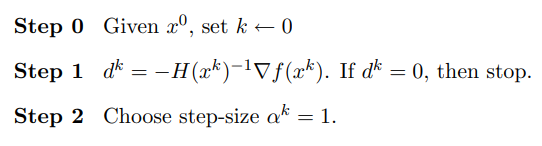

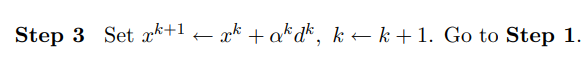

1. **Initialization (Step 0):**
* Start with an initial guess (𝑥0).
* Set the iteration counter (k=0).


2. **Direction Calculation (Step 1):**
* Compute the Newton direction:
      d**k = −H(xk)**−1 ∇f(x**k)
  * ∇f(xk): Gradient of the function at xk, indicating the direction of steepest ascent or descent.
  * H(xk)**−1: Inverse of the Hessian matrix, which scales the gradient to provide second-order information about the function's curvature.
* If dk=0 (the gradient is zero), stop because you are at a critical point.


3. **Update (Step 3):**
* Update the estimate:
      x(k+1) = xk + αk αk.
* Increment the iteration counter (k = k+1).


5. **Repeat:**
* Go back to Step 1 and repeat until convergence.

### code

In [ ]:
def newtons_method(func_grad, func_hess, x0, tol=1e-6, max_iter=100):
  x = np.array(x0)
  for i in range(max_iter):
      grad = func_grad(x)
      hess = func_hess(x)
      step = np.linalg.solve(hess, -grad)
      x += step
      if np.linalg.norm(step) < tol:
          print(f"Converged in {i+1} iterations")
          return x
  print("Did not converge")
  return x

**Powell's Function**

In [ ]:
start_time = time.process_time()

powell_x0 = [3.0, -1.0, 0.0, 1.0]
powell_solution = newtons_method(grad_powell, H_powell, powell_x0)
print("Powell solution:", powell_solution)
print("f(x) =", powell(powell_solution))

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Converged in 35 iterations
Powell solution: [ 1.63513942e-06 -1.63513942e-07  2.61616421e-07  2.61616421e-07]
f(x) = 3.581371756552003e-23
CPU Time: 0.003919 seconds


**Rosenbrock Function**

In [ ]:
start_time = time.process_time()

rosen_x0 = [-1.2, 1.0]
rosen_result = minimize(rosenbrock, rosen_x0, method='Newton-CG', jac=grad_rosenbrock)
print("Rosenbrock's solution:")
print("x =", rosen_result.x)
print("f(x) =", rosen_result.fun)

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Rosenbrock's solution:
x = [0.99999955 0.9999991 ]
f(x) = 2.007023471715827e-13
CPU Time: 0.049983 seconds


### Built-in

**Powell's Function**

In [ ]:
start_time = time.process_time()

print("Scipy's Built-in Method:")
powell_result = minimize(powell, powell_x0, method='Newton-CG', jac=grad_powell, hess=H_powell, tol=1e-10)
print("x =", powell_result.x)
print("f(x) =", powell_result.fun)

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Scipy's Built-in Method:
x = [ 0.00361401 -0.0003614   0.00178603  0.00178608]
f(x) = 3.5104484772744e-10
CPU Time: 0.127229 seconds


**Rosenbrock Function**

In [ ]:
start_time = time.process_time()

print("Scipy's Built-in Method:")
rosenbrock_result = minimize(rosenbrock, rosen_x0, method='Newton-CG', jac=grad_rosenbrock, hess=H_rosenbrock, tol=1e-10)
print("x =", rosenbrock_result.x)
print("f(x) =", rosenbrock_result.fun)

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Scipy's Built-in Method:
x = [1. 1.]
f(x) = 1.316513466254154e-19
CPU Time: 0.021344 seconds


## d) Quasi-Newton method

### Method

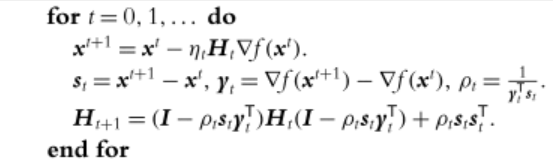

1. Initialize x0(starting point) and H0 (usually as the identity matrix I).
2. For t=0,1,…
* Compute the search direction using Ht and the gradient:
      x(t+1) = xt − ηt Ht ∇f(xt).
* Update
      st = x(t+1) − xt (change in x).
* Update
        yt = ∇f(xt+1) − ∇f(xt) (change in gradients).
* Calculate
      ρt = 1/ yt(trans) st
* Update the inverse Hessian approximation H(t+1) using:
      H(t+1) = (I − ρt st yt(trans)) Ht (I − ρt yt st(trans)) + ρt st st(trans)
* Repeat until convergence criteria are met (gradient norm becomes small).

### code

In [ ]:
def quasi_newton(func, grad_func, x0, tol=1e-6, max_iter=100):
  x = np.array(x0, dtype=float)
  n = len(x0)
  H = np.eye(n)  # Initialize Hessian approximation to identity matrix

  for i in range(max_iter):
    grad = grad_func(x)

    # Check for convergence
    if np.linalg.norm(grad) < tol:
      print(f"Converged in {i + 1} iterations")
      return x

    # Compute the search direction
    p = -np.dot(H, grad)

    # Perform a line search to find an appropriate step size
    alpha = 1.0
    while func(x + alpha * p) > func(x) + 1e-4 * alpha * np.dot(grad, p):
      alpha *= 0.5

    # Update x
    x_next = x + alpha * p

    # Compute s and y for Hessian update
    s = x_next - x
    y = grad_func(x_next) - grad

    # Update the Hessian approximation using the BFGS formula
    rho = 1.0 / np.dot(y, s) if np.dot(y, s) != 0 else 0.0
    if rho > 0:
      I = np.eye(n)
      H = (I - rho * np.outer(s, y)) @ H @ (I - rho * np.outer(y, s)) + rho * np.outer(s, s)

    x = x_next

  print("Did not converge")
  return x

**Powell's Function**

In [ ]:
start_time = time.process_time()

powell_x0 = [3.0, -1.0, 0.0, 1.0]
powell_solution = quasi_newton(powell, grad_powell, powell_x0)
print("Powell's solution:", powell_solution)
print("f(x) =", powell(powell_solution))

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Converged in 30 iterations
Powell's solution: [ 0.00355075 -0.00035508  0.0017499   0.00174994]
f(x) = 3.259949999463089e-10
CPU Time: 0.013377 seconds


**Rosenbrock Function**

In [ ]:
start_time = time.process_time()

rosen_x0 = [-1.2, 1.0]
rosenbrock_solution = quasi_newton(rosenbrock, grad_rosenbrock, rosen_x0)
print("Powell's solution:", rosenbrock_solution)
print("f(x) =", rosenbrock(rosenbrock_solution))

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Converged in 35 iterations
Powell's solution: [1.         0.99999999]
f(x) = 2.7456468514347293e-17
CPU Time: 0.006766 seconds


### Built-in

**Powell's Function**

In [ ]:
start_time = time.process_time()

print("Scipy's Built-in Method:")
powell_result = minimize(powell, powell_x0, method='BFGS', jac=grad_powell)
print("Powell's solution:")
print("x =", powell_result.x)
print("f(x) =", powell_result.fun)

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Scipy's Built-in Method:
Powell's solution:
x = [ 0.0057236  -0.00057236  0.00128532  0.00128542]
f(x) = 3.9775362416810474e-09
CPU Time: 0.010685 seconds


**Rosenbrock Function**

In [ ]:
start_time = time.process_time()

rosenbrock_result = minimize(rosenbrock, rosen_x0, method='BFGS', jac=grad_rosenbrock)
print("Rosenbrock's solution:")
print("x =", rosenbrock_result.x)
print("f(x) =", rosenbrock_result.fun)

end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

Rosenbrock's solution:
x = [0.99999997 0.99999995]
f(x) = 2.535307212609571e-15
CPU Time: 0.010691 seconds


##e) Fletcher-Reeves CG Method.

### Method

From Engneering optimization RAO book (2019)


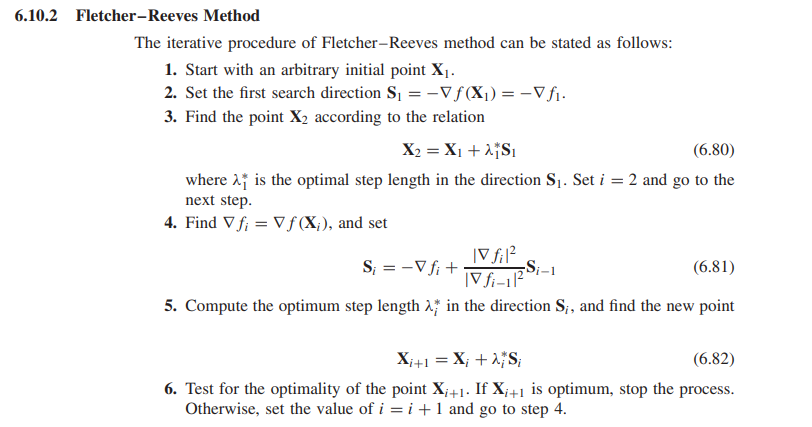

### code

In [ ]:
def fletcher_reeves(gradF, hessianF, x0, tol=1e-6, epsilon=1e-6, max_iterations = 1000, n=5):
  x= np.array(x0, dtype = float)
  grad  = gradF(x)
  S = -grad
  iteration_count = 0

  print(f'{"Iter":<5} {"x1":<15} {"x2":<15} {"|Grad|":<15} {"Lambda":<15} {"Beta":<15}')
  print(f'{iteration_count:<5} {x[0]:<15.6f} {x[1]:<15.6f} {np.linalg.norm(grad):<15.6f} {"-":<15} {"-":<15}')

  while np.linalg.norm(grad) > tol and iteration_count < max_iterations:
    #to get 2ad eh el step
    hessian = hessianF(x)
    hessian += np.eye(len(x)) * epsilon
    lambdaa = (np.linalg.norm(grad) ** 2)/ (S.T @ hessian @ S)

    #update x
    x_prev = x
    x = x + lambdaa * S

    #update gradient
    grad_prev = grad
    grad = gradF(x)

    #calculate beta
    if iteration_count % n < n-1:
      beta = 0
    else:
      beta = (np.linalg.norm(grad) /np.linalg.norm(grad_prev)) ** 2

    #update direction
    S = -grad + beta * S

    #step size tolerance check
    delta_x = np.linalg.norm(x - x_prev)
    if delta_x / (1+np.linalg.norm(x)) < epsilon:
      print("tolerance reached")
      break
    iteration_count += 1
    print(f'{iteration_count:<5} {x[0]:<15.6f} {x[1]:<15.6f} {np.linalg.norm(grad):<15.6f} {lambdaa:<15.6f} {beta:<15.6f}')

  print("optimization reached ")
  return iteration_count, x, gradF(x)

### Problem 1

In [ ]:
x0 =[1.5,1.5]

start_time = time.process_time()
iterations, optimal_x, final_grad = fletcher_reeves(
    gradF = grad_rosenbrock,
    hessianF= H_rosenbrock,
    x0 =x0,
    tol=1e-6,
    epsilon=1e-6,
    max_iterations=1000,
    n=10
)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("optimal point is:", optimal_x)
print(f"gradF norm: {np.linalg.norm(final_grad):.6f}")

funciton_value = rosenbrock(optimal_x)
print(f"Function value at optimal point {funciton_value}")

Iter  x1              x2              |Grad|          Lambda          Beta           
0     1.500000        1.500000        475.290438      -               -              
1     1.301489        1.566023        71.864813       0.000440        0.000000       
2     1.259553        1.581990        2.918733        0.000624        0.000000       
3     1.257658        1.582601        0.190499        0.000682        0.000000       
4     1.226340        1.494843        5.225270        0.489130        0.000000       
5     1.222856        1.496133        0.169233        0.000711        0.000000       
6     1.214680        1.479976        1.989475        0.106998        0.000000       
7     1.215972        1.479316        0.165067        0.000729        0.000000       
8     1.210337        1.468716        1.610400        0.072724        0.000000       
9     1.211382        1.468157        0.162291        0.000736        0.000000       
10    1.206833        1.459874        1.417602        

### Results

The algorithm successfully converged to a solution near
[
1
,
1
], which is the known global minimum of the Rosenbrock function.
The gradient norm and function value are extremely small, indicating a highly precise result.

Final Optimal Values:

x
1
​
 =0.99999918
x
2
​
 =0.99999836
These are both very close to the exact minimum at
[
1
,
1
].

Function Value:

The function value at the optimal point is nearly
0
0, as expected for the Rosenbrock function at its minimum.

CPU Time:

The CPU time (
0.017812

seconds) is reasonable for an optimization with 41 iterations, indicating efficiency.

### Problem 2


In [ ]:
x0 =[3,-1,0,1]

start_time = time.process_time()
iterations, optimal_x, final_grad = fletcher_reeves(
    gradF = grad_powell,
    hessianF= H_powell,
    x0 =x0,
    tol=1e-6,
    epsilon=1e-6,
    max_iterations=1000,
    n=3
)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("optimal point is:", optimal_x)
print(f"gradF norm: {np.linalg.norm(final_grad):.6f}")

funciton_value = powell(optimal_x)
print(f"Function value at optimal point {funciton_value}")

Iter  x1              x2              |Grad|          Lambda          Beta           
0     3.000000        -1.000000       458.776634      -               -              
1     2.653537        -0.836958       158.842817      0.001132        0.000000       
2     2.383834        -0.428000       43.720305       0.003504        0.000000       
3     2.290052        -0.179495       21.584744       0.006471        0.243740       
4     1.852149        -0.185142       19.733372       0.027284        0.000000       
5     1.845461        -0.114753       11.840582       0.006118        0.000000       
6     1.810421        -0.199168       13.071498       0.011546        1.218722       
7     1.692515        -0.171976       10.004722       0.019848        0.000000       
8     1.531572        -0.122992       6.703870        0.017980        0.000000       
9     1.484018        -0.165839       8.442200        0.013140        1.585843       
10    1.137383        -0.084894       9.660184        

### Results

The algorithm successfully converged to a solution with a very low function value and gradient norm, indicating it found an approximate minimum of the Powell function.
Convergence occurred after
236 iterations, which is reasonable for a complex function like Powell's.

Final Optimal Values:

𝑥
1
=
0.01787079

𝑥
2
=
−
0.00178699

𝑥
3
=
0.00890368

𝑥
4
=
0.00890832

These values are close to the expected minimum, which is near zero for Powell's function.

Function Value:

The function value at the optimal point is
2.1204
×
1
0
−
7
 , indicating that the algorithm achieved a very high level of precision.


CPU Time:

The CPU time (
0.095

seconds) is efficient given the complexity of the optimization process.

### Built-in

In [ ]:
# Initial point
x0_r = [1.5, 1.5]
x0_p = [3,-1,0,1]

# Optimize using Conjugate Gradient
start_time = time.process_time()
result_for_rosenbrock = minimize(rosenbrock, x0_r, method='CG', jac=grad_rosenbrock, tol=1e-6)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time for rosebrock: {cpu_time:.6f} seconds")
print("--------------------------------------------------------------------------------")
start_time = time.process_time()
result_for_powell = minimize(powell, x0_p, method='CG', jac=grad_powell, tol=1e-6)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time for powell: {cpu_time:.6f} seconds")
print("--------------------------------------------------------------------------------")
# Print the results for rosenbrock
print("Optimal point for rosenbrock:", result_for_rosenbrock.x)
print("Function value at optimal point:", result_for_rosenbrock.fun)
print("Gradient norm at optimal point:", np.linalg.norm(result_for_rosenbrock.jac))
print("Number of iterations:", result_for_rosenbrock.nit)
print("Message:", result_for_rosenbrock.message)
print("--------------------------------------------------------------------------------")
# Print the results for powell
print("Optimal point for rosenbrock:", result_for_powell.x)
print("Function value at optimal point:", result_for_powell.fun)
print("Gradient norm at optimal point:", np.linalg.norm(result_for_powell.jac))
print("Number of iterations:", result_for_powell.nit)
print("Message:", result_for_powell.message)

CPU Time for rosebrock: 0.008228 seconds
--------------------------------------------------------------------------------
CPU Time for powell: 0.012827 seconds
--------------------------------------------------------------------------------
Optimal point for rosenbrock: [1. 1.]
Function value at optimal point: 2.7236483554998383e-19
Gradient norm at optimal point: 3.2212373436780963e-09
Number of iterations: 13
Message: Optimization terminated successfully.
--------------------------------------------------------------------------------
Optimal point for rosenbrock: [ 6.10189776e-04 -6.10150132e-05  2.54166694e-03  2.54173234e-03]
Function value at optimal point: 8.395763989673001e-10
Gradient norm at optimal point: 1.087448247862705e-06
Number of iterations: 59
Message: Optimization terminated successfully.


##f) Marquardt Method

### Method

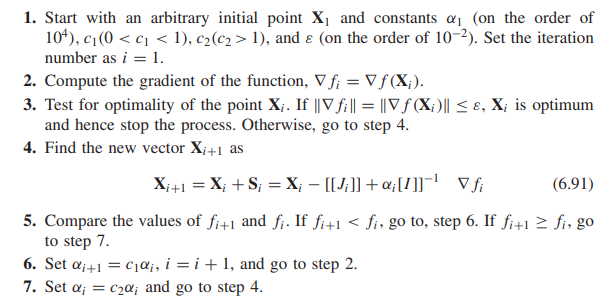

### code

In [ ]:
def marquardt(gradF, hessianF, x0, tol=1e-6, epsilon=1e-6, max_iterations=1000, lambda_init=1e-3):
    x = np.array(x0, dtype=float)
    grad = gradF(x)
    lambdaa = lambda_init
    iteration_count = 0

    print(f'{"Iter":<5} {"x1":<15} {"x2":<15} {"|Grad|":<15} {"Lambda":<15} {"Beta":<15}')
    print(f'{iteration_count:<5} {x[0]:<15.6f} {x[1]:<15.6f} {np.linalg.norm(grad):<15.6f} {"-":<15} {"-":<15}')

    while np.linalg.norm(grad) > tol and iteration_count < max_iterations:
        #to get 2ad eh el step
        hessian = hessianF(x)
        hessian_modified = hessian + lambdaa * np.eye(len(x))

       #update x
        delta_x = -np.linalg.solve(hessian_modified, grad)
        x_new = x + delta_x
        # h check if the lamdaa increases the function or not
        if np.linalg.norm(gradF(x_new)) < np.linalg.norm(grad):
          #accept lambda and decrease it
            x = x_new
            grad = gradF(x)
            lambdaa /= 10
        else:
          # reject lambda and increasse it
            lambdaa *= 10

        if np.linalg.norm(delta_x) / (1 + np.linalg.norm(x)) < epsilon:
            print("Tolerance reached.")
            break

        iteration_count += 1
        print(f'{iteration_count:<5} {x[0]:<15.6f} {x[1]:<15.6f} {np.linalg.norm(grad):<15.6f} {lambdaa:<15.6f}')

    print("Optimization completed.")
    return iteration_count, x, gradF(x)

###Problem 1

In [ ]:
x0 =[1.5,1.5]

start_time = time.process_time()
iterations, optimal_x, final_grad = marquardt(
    gradF = grad_rosenbrock,
    hessianF= H_rosenbrock,
    x0 =x0,
    tol=1e-6,
    epsilon=1e-6,
    max_iterations=1000
)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("optimal point is:", optimal_x)
print(f"gradF norm: {np.linalg.norm(final_grad):.6f}")

funciton_value = rosenbrock(optimal_x)
print(f"Function value at optimal point {funciton_value}")

Iter  x1              x2              |Grad|          Lambda          Beta           
0     1.500000        1.500000        475.290438      -               -              
1     1.496681        2.240041        1.002176        0.000100       
2     1.496681        2.240041        1.002176        0.001000       
3     1.496681        2.240041        1.002176        0.010000       
4     1.496681        2.240041        1.002176        0.100000       
5     1.496681        2.240041        1.002176        1.000000       
6     1.496681        2.240041        1.002176        10.000000      
7     1.486472        2.210950        0.319148        1.000000       
8     1.486472        2.210950        0.319148        10.000000      
9     1.476698        2.181991        0.311523        1.000000       
10    1.476698        2.181991        0.311523        10.000000      
11    1.467015        2.153466        0.306861        1.000000       
12    1.467015        2.153466        0.306861        10.0

###Results

The algorithm successfully converged to the known global minimum of the Rosenbrock function.
The final values are extremely close to the theoretical minimum of
[
1
,
1
].

Final Optimal Values:

x 1
​
 =1.00000003,
𝑥2
=
1.00000006
These values are almost identical to the expected minimum
[
1
,
1
].

Function Value:

The function value at the optimal point is
7.8888
×
1
0
−
16
 , which is essentially zero, confirming that the algorithm achieved a very high level of precision.

CPU Time:

The algorithm was efficient, completing the optimization process in
0.073

seconds


###Problem 2

In [ ]:
x0 =[0,0,0,1]

start_time = time.process_time()
iterations, optimal_x, final_grad = marquardt(
    gradF = grad_powell,
    hessianF= H_powell,
    x0 =x0,
    tol=1e-6,
    epsilon=1e-6,
    max_iterations=1000,
)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")
print("optimal point is:", optimal_x)
print(f"gradF norm: {np.linalg.norm(final_grad):.6f}")

funciton_value = powell(optimal_x)
print(f"Function value at optimal point {funciton_value}")

Iter  x1              x2              |Grad|          Lambda          Beta           
0     0.000000        0.000000        64.807407       -               -              
1     -0.110723       0.011072        20.571838       0.000100       
2     -0.073849       0.007385        6.095356        0.000010       
3     -0.049233       0.004923        1.806033        0.000001       
4     -0.032822       0.003282        0.535121        0.000000       
5     -0.021881       0.002188        0.158554        0.000000       
6     -0.014588       0.001459        0.046979        0.000000       
7     -0.009725       0.000973        0.013920        0.000000       
8     -0.006483       0.000648        0.004124        0.000000       
9     -0.004322       0.000432        0.001222        0.000000       
10    -0.002882       0.000288        0.000362        0.000000       
11    -0.001921       0.000192        0.000107        0.000000       
12    -0.001281       0.000128        0.000032        0.00

###Results

The optimization converged very quickly, achieving a solution with a gradient norm of
1.0
×
1
0
−
6
1.0×10
−6
 and a very small function value after only
15 iterations.

Final Optimal Values:

The solution is close to the theoretical minimum for Powell's function:

x1
​,
x2
,
x3
,
x4
≈0

Function Value:

The function value at the optimal point is
4.7407
×
1
0
−
10, indicating high precision and a successful minimization.

CPU Time:

The optimization was very efficient, completing in
0.007164

seconds, which is impressive given the function's complexity.

### Built-in


In [ ]:
# Initial point
x0_r = [1.5, 1.5]
x0_p = [3,-1,0,1]

# Optimize using Conjugate Gradient
start_time = time.process_time()
result_for_rosenbrock = minimize(rosenbrock, x0_r, method='Powell', tol=1e-6)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time for rosebrock: {cpu_time:.6f} seconds")
print("--------------------------------------------------------------------------------")
start_time = time.process_time()
result_for_powell = minimize(powell, x0_p, method='Powell', tol=1e-6)
end_time = time.process_time()
cpu_time = end_time - start_time
print(f"CPU Time for powell: {cpu_time:.6f} seconds")
print("--------------------------------------------------------------------------------")
# Print the results for rosenbrock
print("Optimal point for rosenbrock:", result_for_rosenbrock.x)
print("Function value at optimal point:", result_for_rosenbrock.fun)
print("Number of iterations:", result_for_rosenbrock.nit)
print("Message:", result_for_rosenbrock.message)
print("--------------------------------------------------------------------------------")
# Print the results for powell
print("Optimal point for rosenbrock:", result_for_powell.x)
print("Function value at optimal point:", result_for_powell.fun)
print("Number of iterations:", result_for_powell.nit)
print("Message:", result_for_powell.message)

CPU Time for rosebrock: 0.018238 seconds
--------------------------------------------------------------------------------
CPU Time for powell: 0.060834 seconds
--------------------------------------------------------------------------------
Optimal point for rosenbrock: [1. 1.]
Function value at optimal point: 0.0
Number of iterations: 17
Message: Optimization terminated successfully.
--------------------------------------------------------------------------------
Optimal point for rosenbrock: [ 1.91922080e-06 -1.91920364e-07  3.07132656e-06  3.07132758e-06]
Function value at optimal point: 1.92749671744345e-21
Number of iterations: 31
Message: Optimization terminated successfully.


# Resources

[1] Rao, S.S. (2009) Engineering Optimization Theory and Practice. 4th Edition, John Wiley & Sons, Inc., Hoboken, New Jersey. - References - Scientific Research Publishing. (n.d.). https://www.scirp.org/reference/referencespapers?referenceid=1701282

[2] R. M. Freund, "Newton’s Method for Unconstrained Optimization," Massachusetts Institute of Technology, Cambridge, MA, Feb. 2004. https://ocw.mit.edu/courses/15-084j-nonlinear-programming-spring-2004/83159d56de04a7e7dc94d0348fa4ccda_lec3_newton_mthd.pdf

[3] Shi, Y., Yang, K., Yang, Z., & Zhou, Y. (2021). Convex optimization. In Elsevier eBooks (pp. 37–55). https://doi.org/10.1016/b978-0-12-823817-2.00012-7